# understanding data


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df=sns.load_dataset("titanic")
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


# cleaning data

In [ ]:
x=df.drop("alive",axis=1,inplace=True) # survie and alive as same values
x

In [ ]:
null=df.isnull().sum() # print null values
print(null[null>0])

age            177
embarked         2
deck           688
embark_town      2
dtype: int64


In [ ]:
df.drop("deck",axis=1,inplace=True) # somany null values are present

In [ ]:
df.dropna(subset=["embark_town"],inplace=True) # null value present in the column delete the row full

<Axes: xlabel='age', ylabel='Count'>

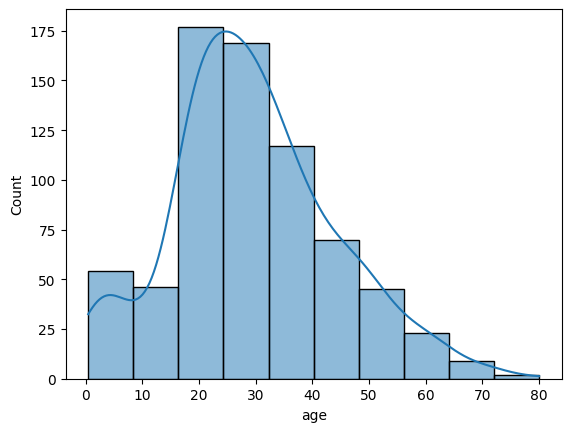

In [ ]:
sns.histplot(df["age"],bins=10,kde=True)

In [ ]:
df['age'].fillna(df['age'].median(), inplace=True) # filling the missing value with median it is a skewed

<ipython-input-9-901d72fe846c>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].median(), inplace=True) # filling the missing value with median it is a skewed


In [ ]:
df["embarked"].value_counts()

,count
embarked,
S,644
C,168
Q,77


In [ ]:
df["embark_town"].value_counts()

,count
embark_town,
Southampton,644
Cherbourg,168
Queenstown,77


In [ ]:
# df["embarked"],df["embark_town"] this both column are same so droping the column embark_town
df.drop("embark_town",axis=1,inplace=True)

In [ ]:
df.shape

(889, 12)

In [ ]:
# cheking this dataset exists duplicates or not
df.drop_duplicates(inplace=True)

In [ ]:
df.describe() # information about statistics

,survived,pclass,age,sibsp,parch,fare
count,773.000000,773.000000,773.000000,773.000000,773.000000,773.000000
mean,0.411384,2.249677,29.528357,0.530401,0.421734,34.761659
std,0.492403,0.852315,13.731264,0.991241,0.841380,52.425906
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,21.000000,0.000000,0.000000,8.050000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,15.900000
75%,1.000000,3.000000,36.000000,1.000000,1.000000,33.500000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df.nunique()

,0
survived,2
pclass,3
sex,2
age,88
sibsp,7
parch,7
fare,247
embarked,3
class,3
who,3


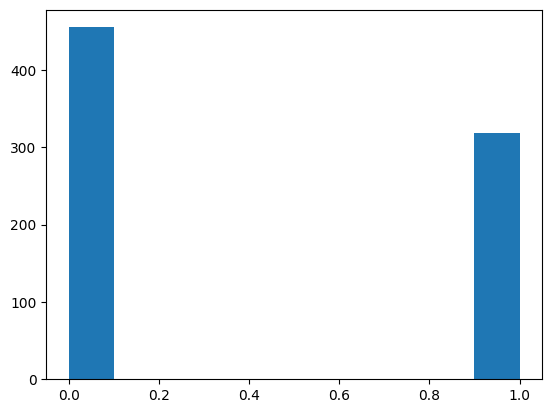

In [ ]:
plt.hist(df["survived"])
plt.show()

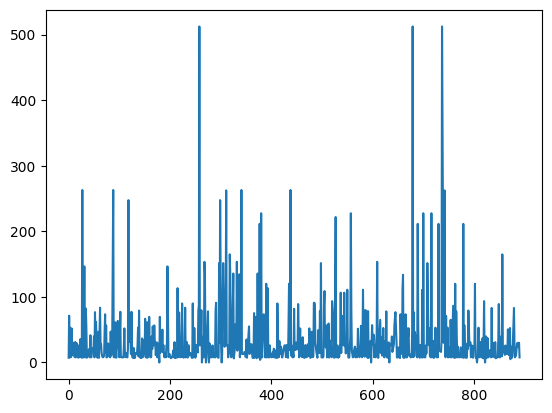

In [ ]:
plt.plot(df["fare"])
plt.show()

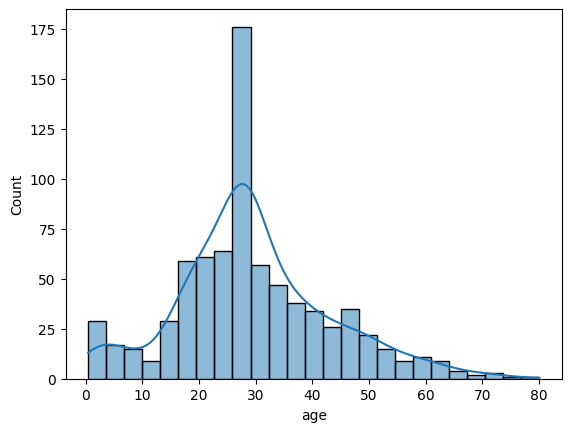

In [ ]:
sns.histplot(df['age'], kde=True)
plt.show()

In [ ]:
df['sex'].unique()

array(['male', 'female'], dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [ ]:
df['sex'] = le.fit_transform(df['sex'])
df['who'] = le.fit_transform(df['who'])
df['adult_male']=le.fit_transform(df['adult_male'])
df['alone']=le.fit_transform(df['alone'])
df['class'] = le.fit_transform(df['class'])
df['embarked']=le.fit_transform(df['embarked'])

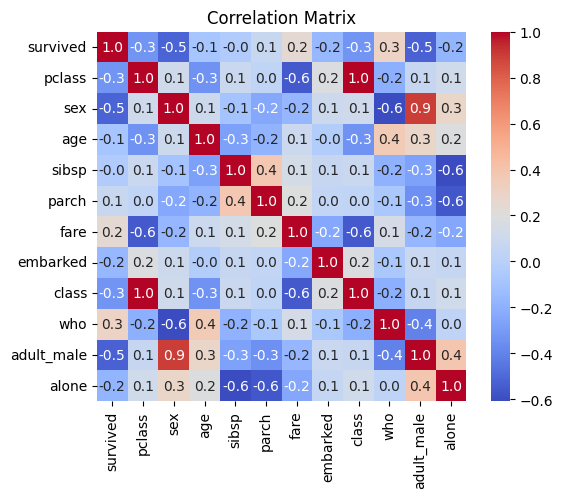

In [ ]:
# Correlation matrix
corr_matrix = df.corr()
sns.heatmap(corr_matrix,annot=True, fmt='0.01f', cmap='coolwarm',annot_kws=None, linewidths=0, robust=True,square=True)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
df.drop("sex",axis=1,inplace=True)
df.drop("class",axis=1,inplace=True)

In [ ]:
# Calculate the correlation between 'survived' and all other columns
price_corr = df.corr()['survived']

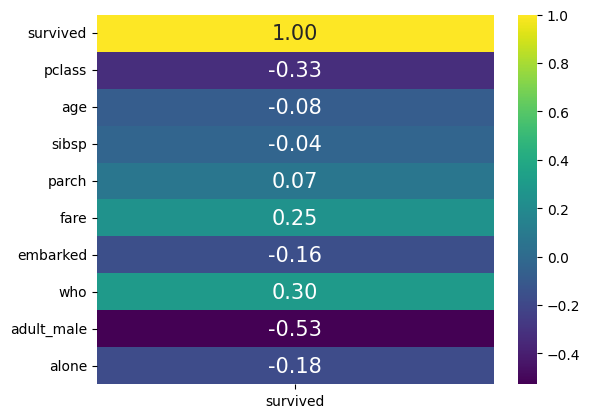

In [ ]:
sns.heatmap(price_corr.to_frame(), annot=True, fmt='.2f', cmap='viridis',
            cbar=True, annot_kws={'size': 15})
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
y=df["survived"]
x=df.drop('survived',axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
model.score(x_test,y_test)

0.8247422680412371

In [ ]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.8247422680412371


<Axes: >

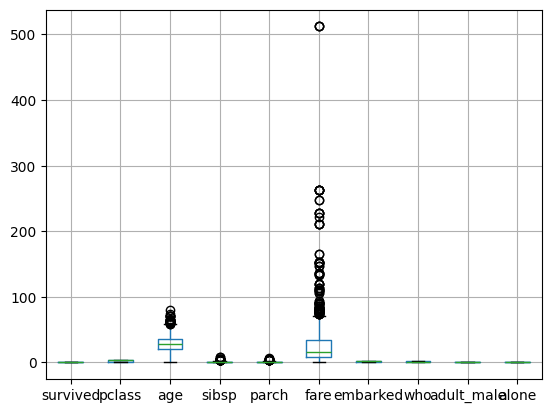

In [ ]:
df.boxplot()

In [ ]:
df.shape

(773, 10)

In [ ]:
# # Function to remove outliers using the IQR method except for one column
# def remove_outliers_iqr(df, exclude_column):
#     for col in df.columns:
#         # Skip the specified column
#         if col == exclude_column:
#             continue
#         Q1 = df[col].quantile(0.25)
#         Q3 = df[col].quantile(0.75)
#         IQR = Q3 - Q1
#         lower_bound = Q1 - 1.5 * IQR
#         upper_bound = Q3 + 1.5 * IQR
#         # Filter the DataFrame to remove rows with outliers in each column
#         df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
# #     return df

# # Specify the column to exclude
# df_cleaned = remove_outliers_iqr(df, exclude_column='price')
# df=df_cleaned

data shape is very small then we donot outlier remove

# Data scaling

## MinMaxScaler()

In [ ]:
# from sklearn.preprocessing import MinMaxScaler
# features = ['fare', 'embarked', "who", "adult_male", "alone"]

In [ ]:
# #create MinMaxScaler object
# scaler = MinMaxScaler()
# scaled_data = scaler.fit_transform(df[features])

In [ ]:
# from sklearn.model_selection import train_test_split
# X = df[['fare', 'embarked',"who","adult_male","alone"]]
# y = df['survived']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import accuracy_score
# # Train a baseline logistic regression model
# model = LogisticRegression()
# model.fit(X_train, y_train)

# # Predict and evaluate the model
# y_pred = model.predict(X_test)
# accuracy = accuracy_score(y_test, y_pred)
# print(accuracy)

non scaler data is more accurate

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

In [ ]:
# Define a dictionary of models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier()
}


# Train and evaluate each model
for model_name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{model_name} accuracy: {accuracy:.2f}')

    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(cm)
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    print("-" * 30)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression accuracy: 0.82
Confusion Matrix:
[[93 11]
 [23 67]]

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.89      0.85       104
           1       0.86      0.74      0.80        90

    accuracy                           0.82       194
   macro avg       0.83      0.82      0.82       194
weighted avg       0.83      0.82      0.82       194

------------------------------
Decision Tree accuracy: 0.75
Confusion Matrix:
[[90 14]
 [34 56]]

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.87      0.79       104
           1       0.80      0.62      0.70        90

    accuracy                           0.75       194
   macro avg       0.76      0.74      0.74       194
weighted avg       0.76      0.75      0.75       194

------------------------------
Random Forest accuracy: 0.75
Confusion Matrix:
[[87 17]
 [31 59]]

Classification Report:
        

In [ ]:
x = df.drop(["survived"], axis=1)
y = df["survived"]

In [ ]:
 x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=42)

In [ ]:
model=RandomForestClassifier()

In [ ]:
model.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
model.predict(x_test)

array([1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1])

In [ ]:
model.score(x_train,y_train)

0.9810017271157168

report
in titanic dataset the highest score is RandomForestClassifier model . It achived the highest accuracy and precision recall f1-score support results